<a href="https://colab.research.google.com/github/crescent98/machinelearning35911/blob/master/assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pylab import plot, show
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

**Load CSV FIle & Setting Train and Test Data**

In [0]:
import csv
train_data=[]
test_data=[]
with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1
        list=[float(x) for x in i]
        train_data.append(list)
        

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1
        list=[float(x)for x in i]
        test_data.append(list)

***Scaling***

In [0]:
data_row=[]
for i in range(0,len(train_data[0])):
  data_row.append([])
  for j in range(0,len(train_data)):
    data_row[i].append(train_data[j][i])
for i in range(0,len(train_data)):
  for j in range(0,len(train_data[0])):
    train_data[i][j]=(train_data[i][j]-np.mean(data_row[j]))/(np.max(data_row[j])-np.min(data_row[j]))

In [0]:
data_row=[]
for i in range(0,len(test_data[0])):
  data_row.append([])
  for j in range(0,len(test_data)):
    data_row[i].append(test_data[j][i])
for i in range(0,len(test_data)):
  for j in range(0,len(test_data[0])):
    test_data[i][j]=(test_data[i][j]-np.mean(data_row[j]))/(np.max(data_row[j])-np.min(data_row[j]))

***Objective Function***

In [0]:
def objective_func(theta,m,data): #data type: 4쌍의 숫자들 x,y,z,h
  sum=0
  for i in range(0,m):
    sum=sum+np.square(theta[0]+theta[1]*data[i][0]+theta[2]*data[i][1]+theta[3]*data[i][2]-data[i][3])
  return (sum/(2*m))

***Linear Function***

In [0]:
#Linear Function
def linear_model(theta,data):
  return (theta[0]+theta[1]*data[0]+theta[2]*data[1]+theta[3]*data[2])

***Gradient Descent Function***

In [0]:
def next_theta(theta,a,m,n,data):#data type: 4쌍의 숫자들 x,y,z,h의 전체집합
  sum=0
  new_theta=[]
  for i in range(0,n): #from theta0 to theta(n+1)
    sum=0
    if i==0:
      for j in range(0,m):
        sum=sum+linear_model(theta,data[j])-data[j][-1]
    else:
      for j in range(0,m):
        sum=sum+(linear_model(theta,data[j])-data[j][-1])*data[j][i-1]
    new_theta.append(theta[i]-(a*sum)/m)
  return new_theta

def gradient(theta,m,data):
  theta_count=len(theta)
  total=0
  sum=[]
  sum_temp=0
  for i in range(0,theta_count):
    sum_temp=0
    if i==0:
      for j in range(0,m):
        sum_temp=sum_temp+linear_model(theta,data[j])-data[j][-1]
    else:
      for j in range(0,m):
        sum_temp=sum_temp+(linear_model(theta,data[j])-data[j][-1])*data[j][i-1]
    sum.append(np.square(sum_temp))
  for i in range(0,len(sum)):
    total=total+sum[i]
  return np.sqrt(total/m)
    

In [331]:
n=len(train_data[0])
print('n is',n)
m_train=len(train_data)
print('m_train is',m_train)
m_test=len(test_data)
print('m_test is',m_test)
theta=[] 
# theta0, theta1, theta2, theta3
i=0
a=0.001
print(theta)
objective_train=[]
objective_test=[]

n is 4
m_train is 300
m_test is 300
[]


***Gradient Descenting***

In [0]:
theta_temp=[-10,-10,-10,-10]

In [0]:
while gradient(theta_temp,m,train_data)>0.5:
  objective_train.append(objective_func(theta_temp,m,train_data))
  objective_test.append(objective_func(theta_temp,m,test_data))
  theta.append(theta_temp)
  theta_temp=next_theta(theta_temp,a,m,n,train_data)
  i=i+1

In [0]:
theta_0=[]
for i in range(0,len(theta)):
  theta_0.append(theta[i][0])
theta_1=[]
for i in range(0,len(theta)):
  theta_1.append(theta[i][1])
theta_2=[]
for i in range(0,len(theta)):
  theta_2.append(theta[i][2])
theta_3=[]
for i in range(0,len(theta)):
  theta_3.append(theta[i][3])

# ***1. Plot the Estimated Parameters Using the training dataset***
plot the estimated parameters(theta0, theta1, theta2, theta3)

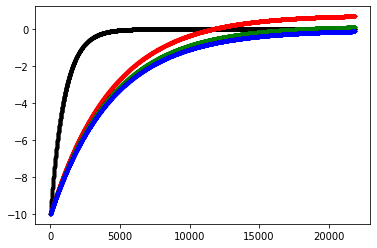

In [335]:
plt.scatter(range(0,i+1),theta_0,c='#000000',s=5)
plt.scatter(range(0,i+1),theta_1,c='#ff0000',s=5)
plt.scatter(range(0,i+1),theta_2,c='#008000',s=5)
plt.scatter(range(0,i+1),theta_3,c='#0000ff',s=5)

# ***2. Plot the training error using the training dataset***

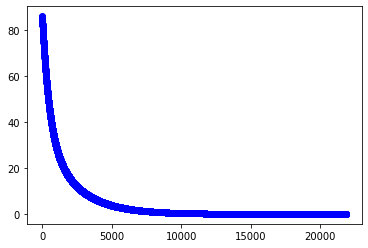

In [336]:
plt.scatter(range(0,i+1),objective_train,c="#0000ff")